# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №1

## №1 (20 баллов)

- Задача минимизации для множественной регресии выглядит вот так:
$$(Y - X\hat{\beta})'(Y - X\hat{\beta}) \rightarrow \min_{\hat{\beta}}$$
- Решите эту задачу минимизации и выведите формулу для оценок коэффициентов $\hat{\beta}$

$Q(\hat{\beta})=(Y - X\hat{\beta})'(Y - X\hat{\beta})=Y'Y-Y'X\hat{\beta}+\hat{\beta}'(X'X)\hat{\beta}-\hat{\beta}'X'Y=Y'Y+\hat{\beta}'(X'X)\hat{\beta}-2\hat{\beta}'X'Y$

$FOC: \frac{dQ(\hat{\beta})}{d\hat{\beta}}=2(X'X)\hat{\beta}-2X'Y=0$

$(X'X)\hat{\beta}=X'Y$

$\hat{\beta}=(X'X)^{-1}X'Y$

## №2 (40 баллов)

![image.png](attachment:image.png)

- У нас есть следующий датасет (`HW_001_001.csv`)
- Нам хочется понять, насколько уровень загрязнения воздуха (диоксид азота $NO_2$ в данном случае) влияет на результаты тестов внимания школьников. В данном домашнем задании будем смотреть на **время реакции**.
- Данные собирались в течение периода с января 2012 г. по март 2013 г. в Барселоне. В исследовании приняли участие 39 школ.
    - `react` - время реакции (ms)
    - `correct` - количество верных ответов
    - `omissions` - были ли тест не сдан
    - `no2_class` - уровень $NO_2$ в классе
    - `no2_home` - уровень $NO_2$ дома
    - `age` - возраст на момент исследования
    - `age0` - возраст поступления в школу
    - `sex` - пол
    - `grade` - класс
    - `overweight` - степень ожирения согласно ВОЗ
    - `lbweight` - весовая категория при рождении
    - `breastfeed` - продолжительность кормления грудью
    - `msmoke` - курила ли мать во время беременности
    - `meducation` - уровень образования матери
    - `feducation` - уровень образования отца
    - `siblings_old` - количество братьев\сестер старшего возраста
    - `siblings_old` - количество братьев\сестер младшего возраста
    - `sev_home` - социально-экономический индекс домашнего района
    - `green_home` - [степень озеленения домашнего района](https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php#:~:text=Normalized%20Difference%20Vegetation%20Index%20(NDVI,up%20the%20spectrum%20of%20sunlight)
    - `noise_school` - уровень шума в школе (дБ)
    - `sev_school` - социально-экономический индекс школы
    - `precip` - осадки

In [1]:
import pandas as pd

In [47]:
df_matrix = pd.read_csv('HW_001_001.csv')

In [48]:
df=df_matrix.dropna()

In [89]:
df.insert(1,'male', pd.get_dummies(df['sex'])['Male'])

ValueError: ignored

In [60]:
#pd.get_dummies(df_matrix['grade'])
df.insert(1, "2nd", pd.get_dummies(df['grade'])['2nd'])
df.insert(1, "3rd", pd.get_dummies(df['grade'])['3rd'])
df.insert(1, "4th", pd.get_dummies(df['grade'])['4th'])

In [65]:
df.insert(1, 'normalweight', pd.get_dummies(df['overweight'])['Normal weight'])

In [67]:
df.insert(1, 'normalbweight',pd.get_dummies(df['lbweight'])['Normal birthweight'])

In [70]:
df.insert(1, '<6m',pd.get_dummies(df['breastfeed'])['<6 months'])
df.insert(1, '>6m',pd.get_dummies(df['breastfeed'])['>6 months'])
df.insert(1, 'no_breastfeed',pd.get_dummies(df['breastfeed'])['No breastfeeding'])

In [72]:
df.insert(1, 'smoke', pd.get_dummies(df['msmoke'])['Smoking'])

In [77]:
for col in pd.get_dummies(df['meducation']).columns:
  df.insert(1, col,pd.get_dummies(df['meducation'])[col])

In [80]:
for col in pd.get_dummies(df['feducation']).columns:
  df.insert(1, f'f_{col}',pd.get_dummies(df['feducation'])[col])

In [92]:
# уберем лишние столбцы
df=df.drop(['sex', 'grade', 'overweight', 'lbweight', 'breastfeed', 'msmoke', 'meducation', 'feducation'], axis=1)

In [111]:
# также уберем столбцы, которые отражают результаты тестов, но не используются в качестве целевых
df=df.drop(['correct', 'omissions'], axis=1)

- Во-первых, посмотрите на описательные статистики

In [97]:
df[['react', 'no2_class', 'no2_home']].describe()

,react,no2_class,no2_home
count,1036.000000,1036.000000,1036.000000
mean,742.322145,30.189140,54.965084
std,144.423757,9.897280,17.999733
min,434.071429,7.794096,2.076335
25%,635.212417,22.818430,44.670537
50%,719.000226,29.910335,54.364584
75%,838.756218,37.234077,62.053890
max,1303.259843,52.563970,118.656770


In [95]:
144.423757/742.322145

0.194556713648897

In [5]:
9.895886/30.167792

0.3280281831696533

In [6]:
18.047859/54.718322

0.3298320990179487

- Какие выводы вы можете сделать?

- Будем смотреть на целевую переменную react и переменные, влияние которых хотим оценить - связанные с уровнем NO2

- react:
  
    - коэффициент вариации std/mean = 20% < 33%, то есть данные однородные

    - медиана < среднего => распределение смещено вправо

- no2_class:

    - коэффициент вариации = 33% - распределение не очень однородное

    - медиана < среднего, но не значительно

- no2_home:

    - коэффициент вариации = 33% - распределение не очень однородное

    - медиана < среднего, но не значительно

- Во-вторых, надо бы нарисовать что-нибудь
- С какой переменной вы бы начали? Какой график бы использовали?
- Нарисуйте 

- Какой вывод вы можете сделать?

In [7]:
import matplotlib.pyplot as plt

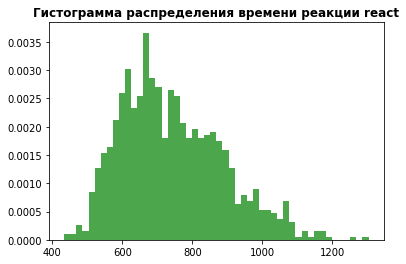

In [16]:
#plt.hist(df_matrix['react'])
n, bins, patches = plt.hist(df_matrix['react'], 50,
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
plt.title('Гистограмма распределения времени реакции react',
          fontweight ="bold")
  
plt.show()

Сначала посмотрим на распределение зависимой переменной. Как и предполагали ранее, распределение смещено; оно не похоже на нормальное, но это не страшно, ведь в теореме Г.-М. нет предпосылки о нормальности

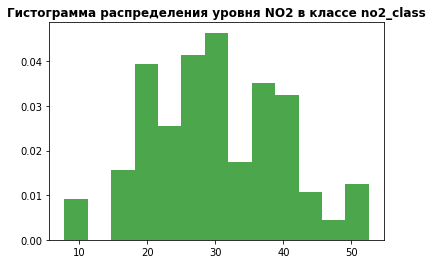

In [38]:
n, bins, patches = plt.hist(df_matrix['no2_class'],13,
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
plt.title('Гистограмма распределения уровня NO2 в классе no2_class',
          fontweight ="bold")
  
plt.show()

Гистограмма распределения NO2 в классе визуально отличается от двух других графиков: все дети одного класса будут иметь одинаковое значение no2_class, что делает распределение менее вариативным. Это распределение нельзя назвать гладким.

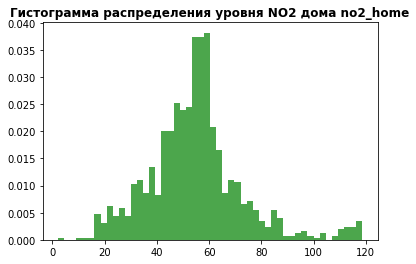

In [31]:
n, bins, patches = plt.hist(df_matrix['no2_home'],50,
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
plt.title('Гистограмма распределения уровня NO2 дома no2_home',
          fontweight ="bold")
  
plt.show()

Распределение выглядит симметричным. Также оно островершинно, что говорит о том, что разброс данных не большой и они сосредочены в районе среднего. При этом можно предположить, что у этого распределения тяжелый правый хвост. 

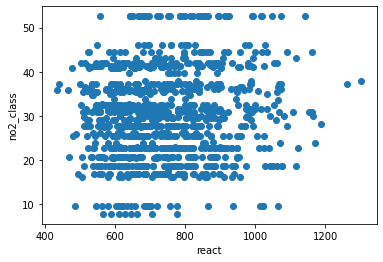

In [124]:
plt.scatter(df['react'], df['no2_class'])
plt.ylabel('no2_class')
plt.xlabel('react')
plt.show()

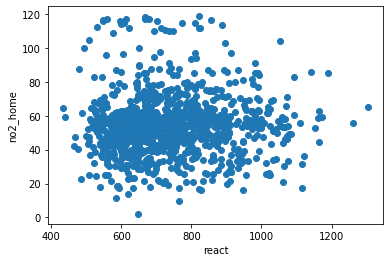

In [125]:
plt.scatter(df['react'], df['no2_home'])
plt.ylabel('no2_home')
plt.xlabel('react')
plt.show()

Графики выше отражают совместное распределение целевой переменной и основных регрессоров. В обоих случаях явной линейной зависимости не наблюдается, на втором графике получше - можно предположить положительную линию тренда.

- Теперь посмотрим на, так называемый, `heatmap`. Если простыми словами, то это просто красивая корреляционная матрица

In [98]:
# Самый простой способ сделать heatmap - взять из библиотеки seaborn
import seaborn as sns

<AxesSubplot:>

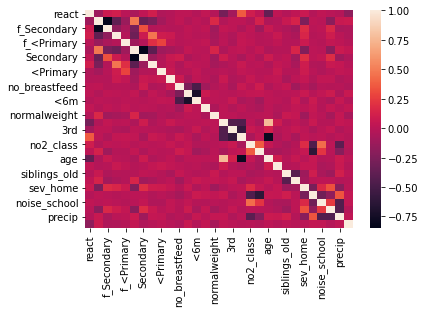

In [114]:
cor=df.corr()
sns.heatmap(cor)

Такую картинку сложно интерпретировать, поэтому построим корреляционную матрицу без категориальных переменных.

In [115]:
a=set(df_matrix.columns)
b=set(df.columns)
float_var=a.intersection(b)

<AxesSubplot:>

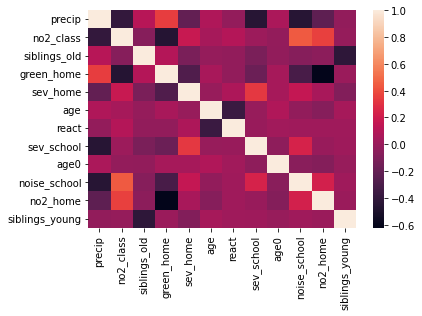

In [116]:
cor_f=df[float_var].corr()
sns.heatmap(cor_f)

- Какой вывод можно сделать?

- react сильнее всего коррелирует с возрастом: ro=-0,37, но и это не очень сильная связь. с переменными no2_class, no2_home связь слабая.

- no2_class коррелирует с precip, green_home, noise_school, no2_home. ro порядка 0,4, то есть связь не сильная

- помимо no2_class, no2_home коррелирует с green_home, но так же не сильно

Вывод:

- в целом сильной корреляции между регрессорами не наблюдается. это хорошо, так как пока не заставляет опасаться мультиколлинеарности

- однако целевая переменная тоже не коррелирует с регрессорами, что может привести к тому, что они будут плохо ее объяснять

In [117]:
cor_f

,precip,no2_class,siblings_old,green_home,sev_home,age,react,sev_school,age0,noise_school,no2_home,siblings_young
precip,1.000000,-0.405484,0.106774,0.343368,-0.209988,0.076759,-0.026566,-0.451910,0.065749,-0.454458,-0.224489,-0.027515
no2_class,-0.405484,1.000000,-0.072071,-0.461495,0.174401,0.046912,0.098934,0.005485,-0.026432,0.436517,0.359192,-0.018594
siblings_old,0.106774,-0.072071,1.000000,0.094345,-0.118384,-0.014379,-0.028643,-0.119300,-0.028463,-0.071398,-0.051536,-0.421992
green_home,0.343368,-0.461495,0.094345,1.000000,-0.280832,0.051262,-0.030051,-0.177974,0.045655,-0.316554,-0.622872,-0.001365
sev_home,-0.209988,0.174401,-0.118384,-0.280832,1.000000,-0.008126,0.069548,0.327924,0.044544,0.158838,0.050816,-0.090253
age,0.076759,0.046912,-0.014379,0.051262,-0.008126,1.000000,-0.369645,-0.010856,0.086902,-0.027773,-0.072775,0.048954
react,-0.026566,0.098934,-0.028643,-0.030051,0.069548,-0.369645,1.000000,-0.002393,0.024271,0.023137,0.019189,0.020333
sev_school,-0.451910,0.005485,-0.119300,-0.177974,0.327924,-0.010856,-0.002393,1.000000,-0.039896,0.238591,-0.005794,0.014248
age0,0.065749,-0.026432,-0.028463,0.045655,0.044544,0.086902,0.024271,-0.039896,1.000000,-0.064055,-0.080945,-0.012656
noise_school,-0.454458,0.436517,-0.071398,-0.316554,0.158838,-0.027773,0.023137,0.238591,-0.064055,1.000000,0.220600,0.019509


- Подумайте над гипотезами о взаимосвязи между зависимой переменной и регрессорами (как переменная X *может влиять* на Y)
- Преобразуйте переменные, если необходимо
- Постройте первую версию модели

Гипотезы (опираясь на корреляционную матрицу):

- age отрицательно влияет на react (чем старше ребенок, тем быстрее реакция)

- no2_home, no2_class положительно влияют на react (чем выше содержание no2 в воздухе, тем хуже реакция)

In [129]:
import statsmodels.api as sm

In [133]:
X=df.drop(['react', 'f_University', 'University', '<6m', '2nd', ], axis=1) # уберем "лишние" фиктивные переменные, из-за которых будет возникать мультиколлинеарность
Y = df['react']

In [134]:
exog = sm.add_constant(X)
model_classic = sm.OLS(endog=Y, exog=exog).fit()
model_classic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     12.56
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.12e-44
Time:                        18:14:10   Log-Likelihood:                -6481.1
No. Observations:                1036   AIC:                         1.301e+04
Df Residuals:                    1010   BIC:                         1.314e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            942.4678    106.377      8.860      0.000     733.723    1151.212
f_Secondary       28.8522     10.238      2.818      0.005       8.762      48.943
f_Primary         40.2230     18.468      2.178      0.030       3.984      76.462
f_<Primary       -26.8441     44.524     -0.603      0.547    -114.215      60.527
Secondary          8.1942     11.050      0.742      0.459     -13.489      29.878
Primary           35.3738     20.890      1.693      0.091      -5.620      76.367
<Primary        -107.8585     61.246     -1.761      0.079    -228.042      12.325
smoke            -20.4593     21.295     -0.961      0.337     -62.246      21.328
no_breastfeed      5.9634     11.836      0.504      0.614     -17.262      29.188
>6m                6.4403      9.264      0.695      0.487     -11.738      24.619
normalbweight     18.3838     14.531      1.265      0.206     -10.130      46.898
normalweight      -3.0363      9.558     -0.318      0.751     -21.792      15.719
4th              -85.3153     25.659     -3.325      0.001    -135.666     -34.965
3rd              -60.6053     15.120     -4.008      0.000     -90.275     -30.935
no2_class          2.4090      0.519      4.640      0.000       1.390       3.428
no2_home          -0.1316      0.295     -0.446      0.655      -0.710       0.447
age              -28.5946     11.412     -2.506      0.012     -50.988      -6.201
age0               5.6168      3.150      1.783      0.075      -0.564      11.798
siblings_old       0.7689      6.684      0.115      0.908     -12.348      13.885
siblings_young    15.1293      6.560      2.306      0.021       2.256      28.003
sev_home          26.0575     23.139      1.126      0.260     -19.349      71.464
green_home        85.9558     75.500      1.138      0.255     -62.199     234.111
noise_school      -0.5249      1.056     -0.497      0.619      -2.598       1.548
sev_school       -11.3692     23.963     -0.474      0.635     -58.393      35.654
precip             4.6708      4.197      1.113      0.266      -3.565      12.906
male             -50.2749      8.055     -6.241      0.000     -66.082     -34.468
==============================================================================
Omnibus:                       47.718   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.354
Skew:                           0.553   Prob(JB):                     2.60e-12
Kurtosis:                       3.113   Cond. No.                     2.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollineari

- Значима ли регрессия в целом?

Регрессия в целом значима Prob (F-statistic)=3.12e-44 (нулевая гипотеза о равенстве коэффициентов нулю отвергается)
- Все ли переменные значимы? Если нет, то, какие ваши дальнейшие шаги?

Многие регрессоры не значимы (P>|t| > 0.05). Постороим регрессию без них

In [132]:
X.columns

Index(['f_University', 'f_Secondary', 'f_Primary', 'f_<Primary', 'University',
       'Secondary', 'Primary', '<Primary', 'smoke', 'no_breastfeed', '>6m',
       '<6m', 'normalbweight', 'normalweight', '4th', '3rd', '2nd',
       'no2_class', 'no2_home', 'age', 'age0', 'siblings_old',
       'siblings_young', 'sev_home', 'green_home', 'noise_school',
       'sev_school', 'precip', 'male'],
      dtype='object')

In [161]:
X=df.drop(['react', 'f_University', 'University', '<6m', '2nd', 'f_<Primary', 'Secondary', 'Primary', '<Primary', 'smoke', 'no_breastfeed',
           '>6m', 'normalbweight', 'normalweight','no2_home','age0', 'siblings_old', 'sev_home', 'green_home', 'noise_school',
       'sev_school', 'precip'], axis=1) 

In [162]:
exog = sm.add_constant(X)
model_classic = sm.OLS(endog=Y, exog=exog).fit()
model_classic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     36.28
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           7.72e-51
Time:                        19:54:33   Log-Likelihood:                -6492.4
No. Observations:                1036   AIC:                         1.300e+04
Df Residuals:                    1027   BIC:                         1.305e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            944.1857     92.276     10.232      0.000     763.115    1125.256
f_Secondary       34.3905      9.187      3.743      0.000      16.364      52.417
f_Primary         57.5408     15.315      3.757      0.000      27.489      87.592
4th              -96.2705     25.160     -3.826      0.000    -145.642     -46.899
3rd              -66.8811     14.848     -4.504      0.000     -96.017     -37.745
no2_class          1.6807      0.403      4.167      0.000       0.889       2.472
age              -22.0195     11.161     -1.973      0.049     -43.920      -0.119
siblings_young    12.8929      5.824      2.214      0.027       1.465      24.321
male             -48.8066      7.985     -6.112      0.000     -64.476     -33.137
==============================================================================
Omnibus:                       50.553   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.902
Skew:                           0.570   Prob(JB):                     4.41e-13
Kurtosis:                       3.138   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
min_aic=model_classic.aic

- Какой у вас получился $R^2, R^2_{adj}, AIC, BIC$?
- Попробуйте улучшить их

Судя по AIC (было 13010, стало 13000), модель с меньшим числом регрессоров получилась лучше. Она значима в целом и все регрессоры значимы.

$R^2=0.22, R^2_{adj}=0.214, AIC=13000, BIC=13050$

- По какой метрике вы бы решали, что ваша регрессия улучшилась?

По информационным критериям: они опираются на функцию правдоподобия, поэтому можно сравнивать разные типы моделей по этому критерию.

Далее с помощью алгоритма включения/исключения регрессоров попытаемся улучшить модель: будем добавлять разные значимые регрессоры к модели с контантой, no2_class и age

In [140]:
import itertools

In [154]:
X=df.drop(['react', 'f_University', 'University', '<6m', '2nd', 'f_<Primary', 'Secondary', 'Primary', '<Primary', 'smoke', 'no_breastfeed',
           '>6m', 'normalbweight', 'normalweight','no2_home','age0', 'siblings_old', 'sev_home', 'green_home', 'noise_school',
       'sev_school', 'precip', 'age', 'no2_class'], axis=1)

In [157]:
variants=X.columns
variants

Index(['f_Secondary', 'f_Primary', '4th', '3rd', 'siblings_young', 'male'], dtype='object')

In [173]:
model=0
x0=['age', 'no2_class']
for n in range(1, len(variants)):
  for vars in itertools.combinations(variants, n):
    exog = sm.add_constant(df[x0+list(vars)])
    model_classic = sm.OLS(endog=Y, exog=exog).fit()
    #models[vars]=model_classic.aic
    #print(exog.columns)
    if model_classic.aic <= min_aic:
      model= exog
      min_aic=model_classic.aic

In [171]:
model

0

Улучшить модель не получилось. Проделаем ту же операцию, но будем добавлять незначимые параметры

In [177]:
X=df.drop(['react', 'f_University', 'University', '<6m', '2nd', ], axis=1)
x0=['age', 'no2_class','f_Secondary', 'f_Primary', '4th', '3rd', 'siblings_young', 'male']
variants=set(X.columns) - set(x0)

In [178]:
model=0
for n in range(1, len(variants)):
  for vars in itertools.combinations(variants, n):
    exog = sm.add_constant(df[x0+list(vars)])
    model_classic = sm.OLS(endog=Y, exog=exog).fit()
    #models[vars]=model_classic.aic
    #print(exog.columns)
    if model_classic.aic <= min_aic:
      model= exog
      min_aic=model_classic.aic

In [181]:
model = sm.OLS(endog=Y, exog=model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     23.82
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.78e-50
Time:                        20:36:40   Log-Likelihood:                -6484.2
No. Observations:                1036   AIC:                         1.300e+04
Df Residuals:                    1022   BIC:                         1.307e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            919.3054     93.538      9.828      0.000     735.757    1102.854
age              -26.2712     11.277     -2.330      0.020     -48.399      -4.143
no2_class          2.3263      0.476      4.890      0.000       1.393       3.260
f_Secondary       34.8589      9.183      3.796      0.000      16.839      52.879
f_Primary         47.6936     17.298      2.757      0.006      13.750      81.638
4th              -90.5996     25.290     -3.582      0.000    -140.226     -40.974
3rd              -63.2986     14.912     -4.245      0.000     -92.560     -34.037
siblings_young    13.8046      5.803      2.379      0.018       2.417      25.192
male             -49.0908      7.952     -6.173      0.000     -64.695     -33.487
precip             5.1744      3.580      1.445      0.149      -1.851      12.199
green_home        95.9089     60.115      1.595      0.111     -22.055     213.873
Primary           28.5749     19.444      1.470      0.142      -9.580      66.730
age0               5.7909      3.117      1.858      0.063      -0.326      11.908
<Primary        -121.8991     57.624     -2.115      0.035    -234.973      -8.825
==============================================================================
Omnibus:                       48.507   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.355
Skew:                           0.558   Prob(JB):                     1.57e-12
Kurtosis:                       3.113   Cond. No.                         820.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
min_aic

12996.396922202066

Получили модель, у которой меньше AIC и больше $R_{adj}^2.$

В целом регрессия значима, при этом содержит регрессоры, незначимые на уровне 95% (precip, green_home, Primary, age0)

# №3 (40 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по оценке стоимости недвижимости в стартапе 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Зато они очень хорошо разбираются в бизнесе
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) замечательный датасет (`HW_001_002.zip`). Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть линейной (хотя бы на первых порах, в будущем, после курса по ML, можете брать и нелинейные модели)
    - Во-вторых, ваша цель не просто предсказание цены на ту или иную недвижимости, а **описание механизма ценообразования на рынке**
    - В-третьих, вашей команде очень важно, чтобы результаты модели были адекватными. **За каждой из включенных переменных должна стоять гипотеза о том, почему эта переменная влияет на цену**. Значимость переменной не является достаточным объяснением о включении переменной в конечную модель
- Помните, что это лишь первая версия модели. Основая цель для текущего анализа - это понимание того, 
    - какие данные есть, 
    - как они "выглядят", 
    - какая получается модель, 
    - какие выводы можно сделать, 
    - насколько эти выводы адекватны и соответствуют вашим гипотезам,
    - как можно еще улучшить модель
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (не будет `seed`, если/где надо, будет 0 за это задание)
    - Было не стыдно показать CEO и др. в стартапе (если графики будут без подписей осей и названия, как минимум, будет 0)

# №4 (20 баллов)*  
- Это задание со звездочкой
- Баллы за это задание идут как дополнительные баллы
- Общий балл за это домашнее задание не может превышать 100 баллов
- Например, если за предыдущие 3 задания было набрано 100 баллов и за это задание набрано 20 баллов, то итоговый балл будет 100 баллов. Если же за предыдущие 3 задания было набрано 90 баллов и за это задание набрано 20 баллов, то итоговый балл все равно будет 100 баллов

- В далеком XIX веке в Лондоне была эпидемия холеры
- В те времена считалось, что холера передается воздушно-капельным путем
- Но один ученый заподозрил, что это не так. Кол-во заболеваний не уменьшалось при соблюдении всех мер предосторожности при такой передаче заболевания
- Ученого звали John Snow ([Snow 1855](https://mixtape.scunning.com/references.html#ref-Snow1854))
- Разберем его идею к дизайну эксперимента 

**Нулевая гипотеза: холера передается водоснабжением**

- Как бы это проверяли, если бы имели бесконечные ресуры? Опишите идеальный эксперимент.

Взяли выборку из здоровых людей, случайно разделили на 3 группы:
- те, кого попытались заразить воздушно-капельным путем (был контакт с больным человеком)
- те, кого попытались заразить через водоснабжение

Через какое-то время проверить гипотезу о равенстве средних в этих группах.


- Но такого сделать мы, конечно, не можем. Однако у нас есть следующая информация
- В 1800-х несколько водоснабжающих компанй обслуживали город. Они все брали воду из Темзы, которая, если верить нашей гипотезе, была зараженной
- Но в 1849 компания Lambeth передвинула свои трубу выше по течению, а компании Southwark и Vauxhall Waterworks Company нет
- Как бы нам это использовать для проверки нашей гипотезы?

Можно предположить, что заболеваемость в домах Southwark и Vauxhall Waterworks Company после 1849 года -- прокси для дома Lambeth, если бы компания не передвинула свои трубы.

Тогда население домов, обслуживаемых компаниями Southwark и Vauxhall Waterworks Company будем считать контрольной выборкой (для них ничего не изменилось).

Население домов обслуживаемых компанией Lambeth -- тестовой.



- Ниже представлена таблица со смертностью в 1849 г. и 1854 г. для потребителей двух разных компаний

|Компания\Год|1849|1854|
|---|---|---|
|Southwark and Vauxhall|135|147|
|Lambeth|85|19|

- Пусть $Y$ - это смертность
- Пусть $D$ - это влияние чистой воды на смертность от холеры (очевидно, если нулевая гипотеза верна, то это влияние отрицательное)
- Пусть $L$ и $SV$ - это фиксированный эффект\влияние специфичный для каждой из компаний Lambeth и Southwark and Vauxhall, соответственно. Например, у них могут быть разные трубы и\или системы очистки воды

|Компания|Результат|
|---|---|
|Southwark and Vauxhall|$$Y=SV$$|
|Lambeth|$$Y=L+D$$|

- Почему мы не можем просто вычесть из результата Lambeth результат Southwark and Vauxhall?

Не учитывается момент, когда источник воды в этих компаниях стал отличаться

- Однако, у нас еще есть временные данные
- Пусть $T$ - это некий временной эффект

|Компания|Время|Результат|
|---|---|---|
|Lambeth|До|$$Y=L$$|
||После|$$Y=L+D+T$$|

- Как будет выглядеть эта табличка для Southwark and Vauxhall?
- Чему будет равно $D$ на тех данных, что были выше?

|Компания|Время|Результат|
|---|---|---|
|Southwark and Vauxhall|До|$$Y=SV$$|
||После|$$Y=SV+T$$|

Тогда $D=\overline{Y_L|post}-\overline{Y_L|pre}-(\overline{Y_{SV}|post}-\overline{Y_{SV}|pre})$

In [152]:
d = 19-85-147+135
d

-78

- То, что вы проделали выше называется `DiD` (difference in differences). Это замечательный метод, который позволяет вам контролировать эффект от эксперимента (`treatment`) на какие-то другие переменные
- Он, отнюдь, не ограничивается временным эффектом, но для простоты задания не будет заходить дальше
- Давайте немного формул для понимания того, что было вами проделано. 
    - Вы нашли `D` - эффект, который оказала чистая вода на смертность от холеры. В идеальном мире, мы с вами бы его считали, как $E[Y_{T=1, S=1} - Y_{T=1, S=0}]$, т.е. уровень смертности в один и тот же момент времени ($T=1$) для контрольной ($S=0$) и тестовой ($S=1$) групп. Но, такое не всегда, мягко говоря, возможно.
    - Поэтому вам пришлось изхищряться, чтобы вычленить временной эффект, т.е. вы считали:
    $$D = (E[Y_{T=1}|S=1] - E[Y_{T=0}|S=1]) - (E[Y_{T=1}|S=0] - E[Y_{T=0}|S=0])$$
    - Это, конечно, замечательное число, но значимо ли оно? На этот вопрос нам с вами поможет ответить, в частности, простая линейная регрессия с дамми/бинарными переменными: $\hat{y} = \hat{\beta_0} + \hat{\beta_1} \cdot T + \hat{\beta_2} \cdot S + \hat{\beta_3} \cdot T \cdot S$
    - Если мы с вами посмотрим на $\beta_0$, то при $T=0, S=0 \rightarrow \hat{y} = \hat{\beta_0} \rightarrow E[y|T=0, S=0] = \hat{\beta_0}$ 
    - Хм, а если у нас $T=1, S=0 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} \rightarrow \hat{\beta_1} = \hat{y} - \hat{\beta_0} = E[y|T=1, S=0] - E[y|T=0, S=0]$
    - А если $T=0, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_2} \rightarrow \hat{\beta_2} = \hat{y} - \hat{\beta_0} = E[y|T=0, S=1] - E[y|T=0, S=0]$
    - А если 
    $$T=1, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} + \hat{\beta_2} +\hat{\beta_3} \rightarrow \\
    E[y|T=1, S=1] = E[y|T=0, S=0] + (E[y|T=1, S=0] - E[y|T=0, S=0]) + (E[y|T=0, S=1] - E[y|T=0, S=0]) +\hat{\beta_3} \rightarrow \\
    \hat{\beta_3} = (E[y|T=1, S=1] - E[y|T=0, S=1]) - (E[y|T=1, S=0] - E[y|T=0, S=0])$$
    - А вот и наш эффект, который мы так хотели посчитать и проверить на стат. значимость. Думаю, что вы уже знаете, как проверять стат. значимость коэффициентов линейной регрессии.

- Перейдем к чему-то с данными
- Надо понять маркетинговый эффект от рекламы на билбордах на увеличение депозитов ($\text{deposits}$) с мая ($JUL = 0$) по июль ($JUL = 1$)
- Всего есть 3 билборда в городе Porto Alegre ($POA = 1$) и никаких наших билбордов в городе Florianopolis ($POA = 0$)
- Посчитайте эффект от рекламы и проверьте его на значимость

In [ ]:
data = pd.read_csv("HW_001_003.csv")
data.head()

- В чем основная слабость этого подхода?

Выдвигается предположение, которое невозможно проверить: что тест и контроль были бы одинаковыми после момента изменения, если бы изменение не произошло (заболеваемость в домах Southwark и Vauxhall Waterworks Company после 1849 года -- прокси для дома Lambeth, если бы компания не передвинула свои трубы). Мы можем наблюдать динамику показателей в этих группах до изменения и предполагать, что она была бы такой же, если бы не изменение, но проверить мы это напрямую не можем.  